# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")
#Loop through the cities in the city list 
for city in cities:  
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Nipawin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=nipawin
Processing Record 2 | Sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=sorland
Processing Record 3 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=bredasdorp
Processing Record 4 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=tuatapere
Processing Record 5 | Mancora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=mancora
Processing Record 6 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=punta arenas
Processing Record 7 | Kasongo-Lunda
http://api.openweathermap.org/data/2.5/we

Processing Record 56 | Lyuban
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=lyuban
Processing Record 57 | Seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=seoul
City not found. Skipping...
Processing Record 58 | Biloela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=biloela
City not found. Skipping...
Processing Record 59 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=kaitangata
Processing Record 60 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=puerto ayora
Processing Record 61 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=bethel
Processing Record 62 | Duekoue
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 112 | Den Helder
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=den helder
Processing Record 113 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=codrington
Processing Record 114 | Chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=chuy
City not found. Skipping...
Processing Record 115 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=new norfolk
Processing Record 116 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=saskylakh
Processing Record 117 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=hasaki
City not found. Skipping...
Processing Record 118 | Cherskiy
http://api.openweathermap.org/data/2.

Processing Record 168 | Segovia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=segovia
Processing Record 169 | Donegal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=donegal
Processing Record 170 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=souillac
Processing Record 171 | Ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=ketchikan
Processing Record 172 | Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=petropavlovsk-kamchatskiy
Processing Record 173 | Chik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=chik
Processing Record 174 | Jintur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8

Processing Record 223 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=bambous virieux
Processing Record 224 | Kjollefjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=kjollefjord
Processing Record 225 | Flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=flinders
Processing Record 226 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=severo-kurilsk
Processing Record 227 | Fomboni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=fomboni
Processing Record 228 | Boa Vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=boa vista
Processing Record 229 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 279 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=sioux lookout
Processing Record 280 | Rorvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=rorvik
Processing Record 281 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=ilulissat
Processing Record 282 | Mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=mnogovershinnyy
Processing Record 283 | Mumford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=mumford
Processing Record 284 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=hambantota
Processing Record 285 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0

City not found. Skipping...
Processing Record 334 | Takoradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=takoradi
Processing Record 335 | Tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=tual
Processing Record 336 | Labytnangi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=labytnangi
Processing Record 337 | Myitkyina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=myitkyina
Processing Record 338 | Narragansett
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=narragansett
Processing Record 339 | Ocean Springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=ocean springs
Processing Record 340 | Aksu
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record 390 | Marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=marzuq
City not found. Skipping...
Processing Record 391 | Whitehorse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=whitehorse
Processing Record 392 | Tsabong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=tsabong
Processing Record 393 | Kharitonovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=kharitonovo
City not found. Skipping...
Processing Record 394 | Ganzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=ganzhou
Processing Record 395 | Balkhash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=balkhash
Processing Record 396 | Dunedin
http://api.openweathermap.org/data/2.5/w

City not found. Skipping...
Processing Record 446 | Batemans Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=batemans bay
Processing Record 447 | Asosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=asosa
City not found. Skipping...
Processing Record 448 | Ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=ambon
Processing Record 449 | Sirjan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=sirjan
Processing Record 450 | The Valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=the valley
City not found. Skipping...
City not found. Skipping...
Processing Record 451 | Saiha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=saiha
Processing Record 452 | Rafs

Processing Record 501 | Iranshahr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=iranshahr
Processing Record 502 | Praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=praia
Processing Record 503 | Mlimba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=mlimba
City not found. Skipping...
Processing Record 504 | Waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=waipawa
Processing Record 505 | Bucerias
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=bucerias
Processing Record 506 | Oskarshamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0533d8091d9d29cf365253601228c3d&q=oskarshamn
Processing Record 507 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create a dictonary with the lists generated
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [10]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nipawin,90,CA,1577731156,100,53.36,-104.02,17.60,2.24
1,Sorland,75,NO,1577731293,64,67.67,12.69,39.20,20.80
2,Bredasdorp,87,ZA,1577731245,63,-34.53,20.04,66.20,5.82
3,Tuatapere,24,NZ,1577731296,94,-46.13,167.69,51.01,3.00
4,Mancora,40,PE,1577731297,100,-4.10,-81.05,62.60,10.29


In [12]:
# Export & Save Data Into a .csv.
weather_dataframe.to_csv("./Data/weather_dataframe.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

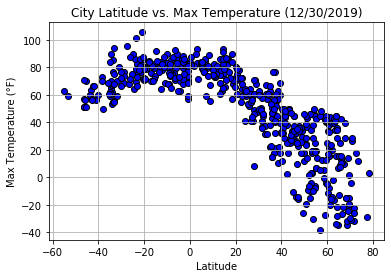

In [26]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (12/30/2019)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()


#### Latitude vs. Humidity Plot

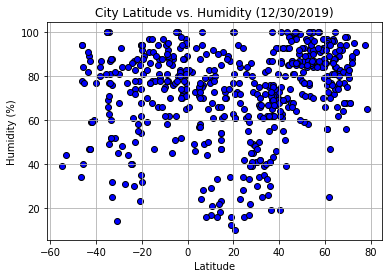

In [27]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], facecolors="blue", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (12/30/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

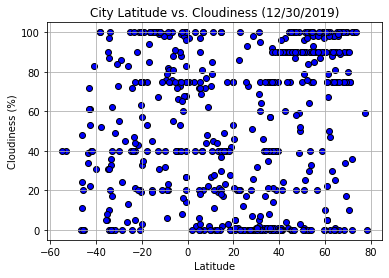

In [28]:

# Build Scatter Plot for Each Data Type
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (12/30/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

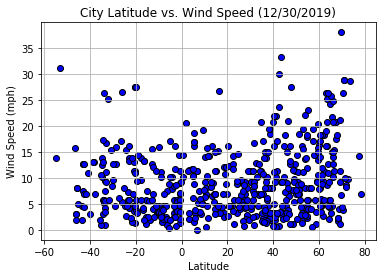

In [29]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (12/30/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [50]:
x_Nhemi = list(weather_dataframe.loc[weather_dataframe["Lat"]>0, "Lat"])
x_Shemi = list(weather_dataframe.loc[weather_dataframe["Lat"]<0, "Lat"])

print(f"Total Northern Cities: {len(x_Nhemi)}")
print(f"Total Southern Cities: {len(x_Shemi)}")
print(f"Total Cities: {len(x_Nhemi+x_Shemi)}")

Total Northern Cities: 376
Total Southern Cities: 171
Total Cities: 547


In [23]:
# Create Northern and Southern Hemisphere DataFrames
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nipawin,90,CA,1577731156,100,53.36,-104.02,17.60,2.24
1,Sorland,75,NO,1577731293,64,67.67,12.69,39.20,20.80
2,Bredasdorp,87,ZA,1577731245,63,-34.53,20.04,66.20,5.82
3,Tuatapere,24,NZ,1577731296,94,-46.13,167.69,51.01,3.00
4,Mancora,40,PE,1577731297,100,-4.10,-81.05,62.60,10.29


In [24]:
N_weather = weather_dataframe[weather_dataframe['Lat'] >= 0]
N_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nipawin,90,CA,1577731156,100,53.36,-104.02,17.60,2.24
1,Sorland,75,NO,1577731293,64,67.67,12.69,39.20,20.80
8,La Ronge,90,CA,1577731302,92,55.10,-105.30,19.40,5.82
10,Pevek,100,RU,1577731238,98,69.70,170.27,-21.53,6.71
11,Sistranda,75,NO,1577731309,87,63.73,8.83,45.00,25.28


In [25]:
S_weather = weather_dataframe[weather_dataframe['Lat'] < 0]
S_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Bredasdorp,87,ZA,1577731245,63,-34.53,20.04,66.20,5.82
3,Tuatapere,24,NZ,1577731296,94,-46.13,167.69,51.01,3.00
4,Mancora,40,PE,1577731297,100,-4.10,-81.05,62.60,10.29
5,Punta Arenas,40,CL,1577731298,44,-53.16,-70.91,59.00,31.09
6,Kasongo-Lunda,88,CD,1577731300,88,-6.48,16.82,70.59,0.98


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8280416367504749


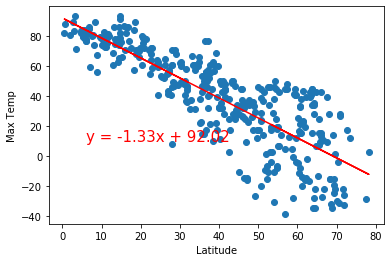

In [32]:
x_values = N_weather['Lat']
y_values = N_weather['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5189279777888476


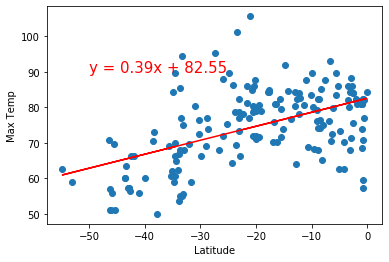

In [44]:
x_values = S_weather['Lat']
y_values = S_weather['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.415506627850125


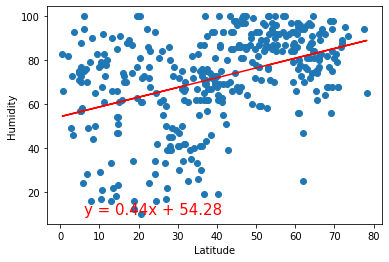

In [36]:
x_values = N_weather['Lat']
y_values = N_weather['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2747183537324934


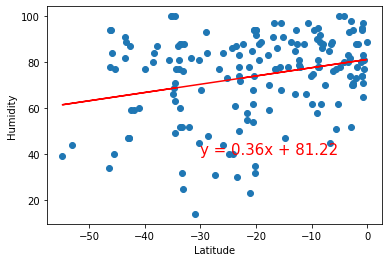

In [46]:
x_values = S_weather['Lat']
y_values = S_weather['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3465502017325597


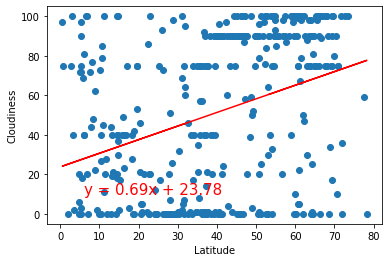

In [38]:
x_values = N_weather['Lat']
y_values = N_weather['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3600862276697706


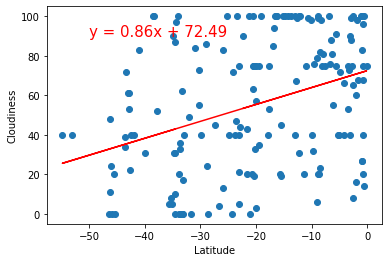

In [47]:
x_values = S_weather['Lat']
y_values = S_weather['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2216323466346627


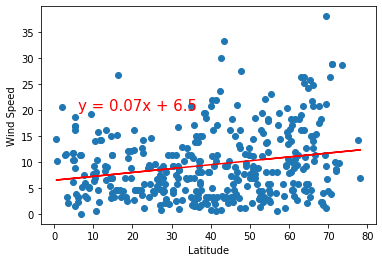

In [48]:
x_values = N_weather['Lat']
y_values = N_weather['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24193437124028752


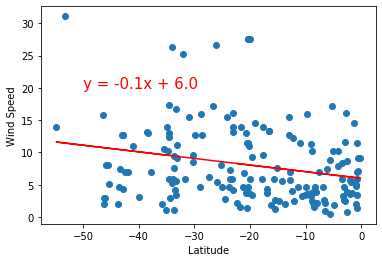

In [49]:
x_values = S_weather['Lat']
y_values = S_weather['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()